## Feature selection:
<br> Arm: Nivolumab & Everolimus
<br> data: clinical data & gene expression data
<br> remove the gene feature when its variances < 0.7
<br> remove the gene feature when its high correlation > 0.4

### Step0. Import Necessary Libraries

In [49]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3
!pip install seaborn==0.13.2

  Using cached numpy-2.2.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.0-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.0 which is incompatible.
numba 0.59.1 requires numpy<1.27,>=1.22, but you have numpy 2.2.0 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.2.0 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.2.0 which is incompatible.
streamlit 1.32.0 requires packaging<24,>=16.8, but you have packaging 24.1 which is incompatible.


  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.0
    Uninstalling numpy-2.2.0:
      Successfully uninstalled numpy-2.2.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.0 requires packaging<24,>=16.8, but you have packaging 24.1 which is incompatible.


import the necessary libraries for data processing, model training, and evaluation.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Step1. Load the dataset and understant the categories of data

In [116]:
file_path = r"C:\Users\Stella Huang\Desktop\UGA\Planned Health\01_Gen&Chem\12_discussion_05Jun2025\dataset_test.csv"
data = pd.read_csv(file_path)
data.head()

,Cohort,Arm,MSKCC,Sarc,Rhab,Number_of_Prior_Therapies,Tumor_Sample_Primary_or_Metastasis,Sex,Age,ORR,...,UBA5,UBA52,UBA52P9,UCHL1,UCHL1.DT,UCP2,VEGFA,ZDHHC20P3,ZDHHC7,ZNF433
0,CM-025,NIVOLUMAB,FAVORABLE,0,0,1,METASTASIS,M,69.0,SD,...,34.12708,37.72089,20.97768,33.51904,20.95017,35.08916,37.12501,20.95143,34.26101,32.57309
1,CM-025,EVEROLIMUS,FAVORABLE,0,0,1,METASTASIS,M,61.0,SD,...,34.51873,38.45319,20.97768,30.55278,20.95017,34.37333,37.90405,20.95143,34.75033,29.95693
2,CM-025,EVEROLIMUS,FAVORABLE,0,0,2,PRIMARY,M,61.0,CRPR,...,33.93403,38.24140,20.97768,35.59001,20.95017,34.55823,38.00575,20.95143,33.93191,31.48046
3,CM-025,NIVOLUMAB,INTERMEDIATE,0,0,1,PRIMARY,M,61.0,PD,...,34.28159,38.68207,20.97768,33.70539,24.64941,35.16243,38.85681,23.38186,34.93732,33.32286
4,CM-025,NIVOLUMAB,INTERMEDIATE,0,0,1,PRIMARY,M,59.0,SD,...,35.16719,39.71092,20.97768,30.91825,20.95017,33.60995,40.34498,20.95143,33.99614,32.66356


I would like to know the categories for each variable (object)

In [117]:
print(set(data['Arm']))
print(set(data['MSKCC']))
print(set(data['Tumor_Sample_Primary_or_Metastasis']))
print(set(data['ORR']))
print(set(data['Benefit']))
print(set(data['ExtremeResponder']))

{'EVEROLIMUS', 'NIVOLUMAB'}
{'POOR', 'FAVORABLE', 'INTERMEDIATE'}
{'METASTASIS', 'PRIMARY', nan}
{'PD', 'NE', 'PR', 'SD', 'CRPR', 'CR'}
{'ICB', 'NCB', 'CB'}
{'ER', 'NEITHER', 'PD'}


Check for null values, and display a summary of the dataset

In [118]:
# Checking for null values
# print(data.isnull().sum())
## data.isnull(): check if there is any NaN in data
## .sum(): sumerize the number of TRUE (if TRUE means NaN), calculate how many NaN in the column

# Dataset summary
print(data.info())
## .info(): showing tyoe and non-null amount
#print(data.describe())
## .describe():statistic info: count, mean, std, min, 25%, 50%, 75%, max

print(data.info(verbose=True, show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Columns: 167 entries, Cohort to ZNF433
dtypes: float64(154), int64(5), object(8)
memory usage: 373.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 167 columns):
 #    Column                              Non-Null Count  Dtype  
---   ------                              --------------  -----  
 0    Cohort                              286 non-null    object 
 1    Arm                                 286 non-null    object 
 2    MSKCC                               286 non-null    object 
 3    Sarc                                286 non-null    int64  
 4    Rhab                                286 non-null    int64  
 5    Number_of_Prior_Therapies           286 non-null    int64  
 6    Tumor_Sample_Primary_or_Metastasis  284 non-null    object 
 7    Sex                                 286 non-null    object 
 8    Age                                 286 non-nu

### Step2. Data pre-processing

Remove outcome-related features to prevent data leakage

In [119]:
leakage_cols = ['Cohort', 'Benefit', 'ExtremeResponder', 'OS', 'OS_CNSR', 'PFS', 'PFS_CNSR']
data = data.drop(columns=leakage_cols)  # Added: drop columns that cause data leakage

See the Distribution of ORR

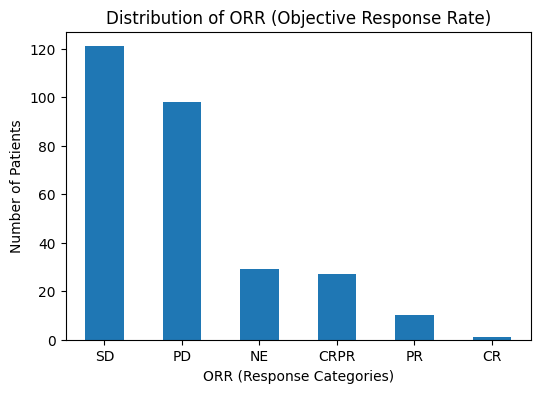

ORR
SD      121
PD       98
NE       29
CRPR     27
PR       10
CR        1
Name: count, dtype: int64

In [120]:
orr_counts = data["ORR"].value_counts()
plt.figure(figsize=(6,4))
orr_counts.plot(kind="bar")
plt.xlabel("ORR (Response Categories)")
plt.ylabel("Number of Patients")
plt.title("Distribution of ORR (Objective Response Rate)")
plt.xticks(rotation=0)
plt.show()
orr_counts

Transfer ORR to binary classification:
<br> Responder (1): "CRPR", "CR","PR"
<br> NON-Responder (0): "PD", "SD"
<br> Remove "NE" (non-evaluate)

In [121]:
# transfer ORR to binary classification
data = data[data["ORR"] != "NE"]  # remove "NE", !=(not equal)
data["ORR_binary"] = data["ORR"].apply(lambda x: 1 if x in ["CRPR", "CR","PR"] else 0)
## data["ORR_binary"] : create a new column "ORR_binary" for saving the binary result
## .apply(...) : apply a function, which will let all value in ORR to transfer, and the function is lambda
## lambda x: it is an anonymous function, x means every value in ORR
### if x in ["CRPR", "CR"] : check if x belongs to ["CRPR", "CR"], if TRUE then 1(Responder), else 0(Non-Responder)

# check the result
data["ORR_binary"].value_counts()
## .value_counts(): count how many times of 1 and 0 in "ORR_binary"


ORR_binary
0    219
1     38
Name: count, dtype: int64

Because some data ("Tumor_Sample_Primary_or_Metastasis", "Sex") is object, I used One-Hot Encoding to transfer object to int.

In [122]:
# Apply One-Hot Encoding to categorical variables
data = pd.get_dummies(data, columns=["Arm", "Tumor_Sample_Primary_or_Metastasis", "Sex", 
                                 ], drop_first=True)

# Check the new dataset structure
print(data.head())


          MSKCC  Sarc  Rhab  Number_of_Prior_Therapies   Age   ORR     ACAP1  \
0     FAVORABLE     0     0                          1  69.0    SD  33.99747   
1     FAVORABLE     0     0                          1  61.0    SD  31.71281   
2     FAVORABLE     0     0                          2  61.0  CRPR  31.73848   
3  INTERMEDIATE     0     0                          1  61.0    PD  30.55362   
4  INTERMEDIATE     0     0                          1  59.0    SD  31.11186   

       ACCS     ACCSL     ADCY5  ...  UCHL1.DT      UCP2     VEGFA  ZDHHC20P3  \
0  32.20615  24.06116  30.91315  ...  20.95017  35.08916  37.12501   20.95143   
1  32.80117  20.57774  30.87107  ...  20.95017  34.37333  37.90405   20.95143   
2  32.27727  20.57774  32.29066  ...  20.95017  34.55823  38.00575   20.95143   
3  32.44389  23.35166  34.22764  ...  24.64941  35.16243  38.85681   23.38186   
4  30.61340  20.57774  33.46771  ...  20.95017  33.60995  40.34498   20.95143   

     ZDHHC7    ZNF433  ORR_binar

And 'MSKCC' is sequential, I define them as FAVORABLE = 2, INTERMEDIATE = 1, POOR = 0<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html

In [123]:
mskcc_map = {
    'POOR': 0,
    'INTERMEDIATE': 1,
    'FAVORABLE': 2
}

data['MSKCC_num'] = data['MSKCC'].map(mskcc_map)

### Step3. Feature selection

Remove genes with low variance (VarianceThreshold) <br>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html

In [124]:

gene_features = ["ACAP1","ACCS","ACCSL","ADCY5","AHRR","AK3P4","ARHGAP42","ARPC1B","ATP6V1G1P2","ATXN3L","BARX2","BICD1","BICD1P1","BMAL2.AS1","BPY2B","BTBD10","BTBD10P1","C3orf20","CACNA1A","CACNG2","CAP1","CAP1P2","CAPN15","CCDC146","CCDC30","CCT7","CCT7P1","CCT7P2","CDS1","CEACAM6","CHST4","CLDN6","CLSPN","CNR1","COPS6","CPPED1","CRPP1","CUL9","CYSRT1","DCAF1","DCAF10","DCAF11","DCAF12","DCAF12L1","DCAF12L2","DCAF13","DCAF13P1","DCAF15","DCAF16","DCAF17","DDHD1.DT","DLGAP5","DOC2A","DPH5","DPH5.DT","DPP4","DPP9","DPP9.AS1","DSPP","ENAHP1","ENAM","EPHB2","EXO1","FALEC","FAM13A","FAM13A.AS1","FAM170A","FAM174A","FAM174A.DT","FAM187B2P","FAUP3","FLT3","FLT3LG","FOCAD.AS1","FTHL17","GADD45A","GAGE2C","GAGE2E","GAGE4","GCOM1","GIT2","GOT2","GOT2P1","GOT2P3","GPR42","GTF2IRD1","HECTD2","HFM1","HILPDA","HLA.DRB1","HLA.G","KRBA2","KRTAP2.3","L1CAM","LINC00994","LINC01307","LINC01396","LOC107984203","LRRC3","LRRC30","LRRC31","LRRC32","LRRC34","LRRC36","LRRC37A","LRRC37A13P","LRRC37A14P","LRRC37A15P","LRRC37A17P","LRRC37A2","LRRC37A3","LRRC37A6P","LRRC37B","LRRC38","LRRC39","LRRC3B","LRRC3C","MASP1","MATCAP1","MIMT1","MIR572","MOAP1","MYOC","MYOCD","NECAP1","NECAP1P2","PLIN2","PSMC1P10","RAB3B","REXO1","RN7SL454P","RN7SL638P","RNU4.30P","RNU4.32P","RPL6P5","S100A6","SIMC1","SLC25A39","SUCNR1","TENM3","TSSK3","UBA5","UBA52","UBA52P9","UCHL1","UCHL1.DT","UCP2","VEGFA","ZDHHC20P3","ZDHHC7","ZNF433"]


To see the distribution of the gene expression values

In [125]:
# Select only the gene feature columns from the DataFrame
gene_df = data[gene_features]
variances = gene_df.var()
print(variances.sort_values())  # from low to high


MIMT1            0.000233
LOC107984203     0.000341
FAUP3            0.000590
RNU4.30P         0.000737
GAGE2C           0.000941
                  ...    
LRRC31           9.502287
CYSRT1           9.729294
CEACAM6         10.753839
DCAF12L1        11.266220
LRRC37A14P      16.046435
Length: 151, dtype: float64


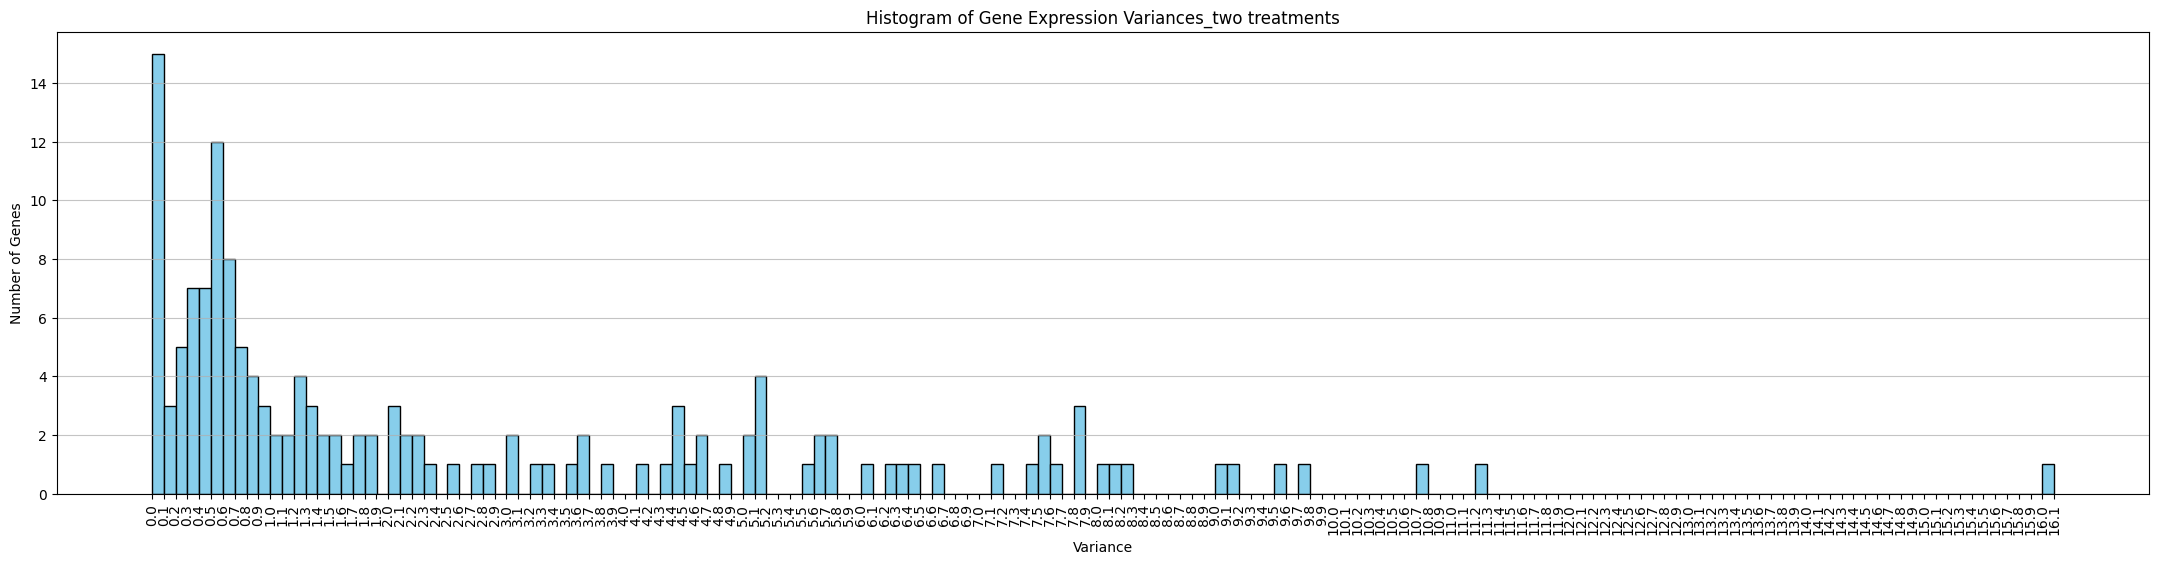

In [126]:
min_val = variances.min() 
max_val = variances.max()
bins = np.arange(min_val, max_val + 0.1, 0.1) 

plt.figure(figsize=(27, 6))
plt.hist(variances, bins=bins, color='skyblue', edgecolor='black')
plt.xlabel('Variance')
plt.ylabel('Number of Genes')
plt.title('Histogram of Gene Expression Variances_two treatments')
plt.xticks(np.round(bins, 1), rotation=90)
plt.grid(axis='y', alpha=0.75)
plt.show()

I would like to know in each range, which genes are included?

In [127]:
variances = gene_df.var()

for i in range(0, 160):  # 0 to 16
    lower = i / 10
    upper = (i + 1) / 10
    genes_in_bin = variances[(variances >= lower) & (variances < upper)].index.tolist()
    print(f"{lower:.1f} <= Variance < {upper:.1f}:", genes_in_bin)

0.0 <= Variance < 0.1: ['AK3P4', 'FAUP3', 'GAGE2C', 'GAGE4', 'LINC00994', 'LINC01307', 'LINC01396', 'LOC107984203', 'MIMT1', 'MIR572', 'RN7SL638P', 'RNU4.30P', 'RPL6P5', 'UBA52P9', 'ZDHHC20P3']
0.1 <= Variance < 0.2: ['ATP6V1G1P2', 'BICD1P1', 'DCAF1']
0.2 <= Variance < 0.3: ['CAP1', 'CCT7', 'COPS6', 'DDHD1.DT', 'FTHL17']
0.3 <= Variance < 0.4: ['BTBD10', 'GIT2', 'LRRC37A17P', 'NECAP1', 'RN7SL454P', 'UCHL1.DT', 'ZDHHC7']
0.4 <= Variance < 0.5: ['CAPN15', 'CUL9', 'DCAF16', 'FAM174A.DT', 'MOAP1', 'RNU4.32P', 'UBA52']
0.5 <= Variance < 0.6: ['DCAF10', 'DCAF15', 'DCAF17', 'DPH5', 'DPP9', 'FALEC', 'FAM187B2P', 'HECTD2', 'LRRC37B', 'REXO1', 'SLC25A39', 'UBA5']
0.6 <= Variance < 0.7: ['ARPC1B', 'DCAF11', 'DCAF12', 'DCAF13', 'FAM13A', 'FOCAD.AS1', 'GOT2', 'GTF2IRD1']
0.7 <= Variance < 0.8: ['ACCS', 'BICD1', 'FAM174A', 'LRRC37A3', 'SIMC1']
0.8 <= Variance < 0.9: ['BMAL2.AS1', 'CPPED1', 'GOT2P1', 'KRBA2']
0.9 <= Variance < 1.0: ['ARHGAP42', 'LRRC32', 'S100A6']
1.0 <= Variance < 1.1: ['CRPP1', 'UC

What is the median of gene variances?

In [128]:
median_variance = variances.median()
print("Median of gene variances:", median_variance)

Median of gene variances: 1.2583797803945258


How many genes below variance= 0.1, 0.5, 0.7, 1.2583797803945258

In [129]:
# Count the number of genes with variance below and equal 0.1, 0.5, 0.7, 1.184
num_genes_below_01 = (variances <= 0.1).sum()
print("Number of genes with variance below 0.1:", num_genes_below_01)

num_genes_below_05 = (variances <= 0.5).sum()
print("Number of genes with variance below 0.5:", num_genes_below_05)

num_genes_below_07 = (variances <= 0.7).sum()
print("Number of genes with variance below 0.7:", num_genes_below_07)

num_genes_below_1_184 = (variances <= 1.2583797803945258).sum()
print("Number of genes with variance below 1.2583797803945258:", num_genes_below_1_184)

Number of genes with variance below 0.1: 15
Number of genes with variance below 0.5: 37
Number of genes with variance below 0.7: 57
Number of genes with variance below 1.2583797803945258: 76


Setting threshold=0.5, apply VarianceThreshold

In [130]:
from sklearn.feature_selection import VarianceThreshold

# Select only the gene feature columns from the DataFrame
gene_df = data[gene_features]

# Remove features with low variance from gene_df
selector = VarianceThreshold(threshold=0.7)  # Set the threshold to 0.5
X_high_variance = selector.fit_transform(gene_df)

# Optional: Get the names of the selected features
# Use gene_df.columns to get the column names of the selected features
selected_columns = gene_df.columns[selector.get_support()]
X_high_variance_df = pd.DataFrame(X_high_variance, columns=selected_columns)

# Print the shape of the original and reduced DataFrames
print("Original shape:", gene_df.shape)
print("Reduced shape:", X_high_variance_df.shape)
# Print the selected columns
print("Selected columns:", selected_columns)



Original shape: (257, 151)
Reduced shape: (257, 94)
Selected columns: Index(['ACAP1', 'ACCS', 'ACCSL', 'ADCY5', 'AHRR', 'ARHGAP42', 'ATXN3L',
       'BARX2', 'BICD1', 'BMAL2.AS1', 'BPY2B', 'BTBD10P1', 'C3orf20',
       'CACNA1A', 'CACNG2', 'CAP1P2', 'CCDC146', 'CCDC30', 'CCT7P1', 'CCT7P2',
       'CDS1', 'CEACAM6', 'CHST4', 'CLDN6', 'CLSPN', 'CNR1', 'CPPED1', 'CRPP1',
       'CYSRT1', 'DCAF12L1', 'DCAF12L2', 'DCAF13P1', 'DLGAP5', 'DOC2A',
       'DPH5.DT', 'DPP4', 'DPP9.AS1', 'DSPP', 'ENAHP1', 'ENAM', 'EPHB2',
       'EXO1', 'FAM13A.AS1', 'FAM170A', 'FAM174A', 'FLT3', 'FLT3LG', 'GADD45A',
       'GAGE2E', 'GCOM1', 'GOT2P1', 'GOT2P3', 'GPR42', 'HFM1', 'HILPDA',
       'HLA.DRB1', 'HLA.G', 'KRBA2', 'KRTAP2.3', 'L1CAM', 'LRRC3', 'LRRC30',
       'LRRC31', 'LRRC32', 'LRRC34', 'LRRC36', 'LRRC37A', 'LRRC37A13P',
       'LRRC37A14P', 'LRRC37A15P', 'LRRC37A2', 'LRRC37A3', 'LRRC37A6P',
       'LRRC38', 'LRRC39', 'LRRC3B', 'LRRC3C', 'MASP1', 'MATCAP1', 'MYOC',
       'MYOCD', 'NECAP1P2', 'PLIN2'

Apply Correlation-based Feature Selection

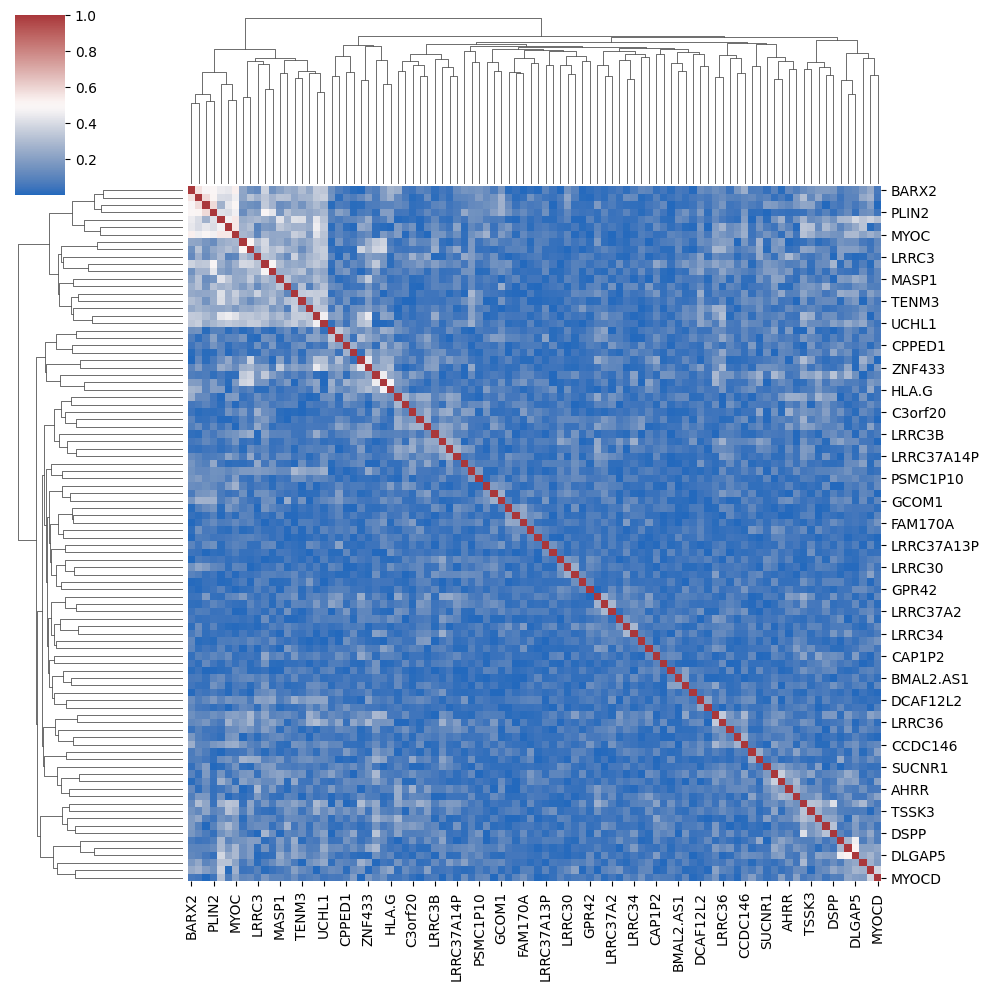

In [131]:
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform

# Select only the gene feature columns from the DataFrame
# After VarianceThreshold
gene_df_high_var = X_high_variance_df.copy() 

# calculate the distance matrix
corr = gene_df_high_var.corr().abs()  # abs() to get the absolute value
# 1 - correlation to get distance
distance = 1 - corr
# linkage = sch.linkage(squareform(distance), method='average')  # average linkage

# create a dendrogram to decide the number of clusters
sns.clustermap(corr, cmap="vlag", figsize=(10,10))


Select gene from correlation heatmap

In [132]:
# Step 1: calculate the correlation matrix
# calculate the pearson correlation matrix between the gene features
corr_matrix = gene_df_high_var.corr().abs()

# Step 2: get the upper triangle of the correlation matrix
# keep only the upper triangle of the correlation matrix
# to avoid duplicate calculations and the diagonal (self-correlation)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# step 3: create a list to keep the columns (keep the one with the highest variance in each group)
# set the threshold for correlation
threshold = 0.4
to_keep = set()
already_seen = set()

# loop through the columns of the upper triangle matrix
for col in upper.columns:
    if col not in already_seen:
        # find other genes that are highly correlated with col
        high_corr = upper[col][upper[col] > threshold].index.tolist()
        high_corr.append(col)
        
        # find the one with the ""highest""" variance in this group
        best_gene = gene_df_high_var[high_corr].var().idxmax()
        ### best_gene: the representative gene in the group
        to_keep.add(best_gene) # keep the representative gene in each group (the list of best_genes)
        already_seen.update(high_corr)

# Step 4: keep the filtered genes
gene_df_filtered = gene_df[list(to_keep)]

# Print the shape of the original and filtered DataFrames
print("Original shape:", gene_df.shape)
print("Filtered shape:", gene_df_filtered.shape)
# Print the selected columns
print("Final selected gene columns:", to_keep) ## genes kept after correlation filtering


# chech the maximum correlation
print("Max correlation among genes:", upper.max().max())

# See how many genes are highly correlated (> threshold)
# print(f"how many genes (>{threshold}):", sum((upper > threshold).sum() > 0)) 
### sum((upper > threshold).sum() > 0): count how many genes have at least one other gene with correlation > threshold

# How many genes are kept
print(f"Number of genes kept: {len(to_keep)}")

# which genes are removed
removed_genes = set(gene_df.columns) - set(to_keep)
print(f"Removed genes ({len(removed_genes)}):", removed_genes)



Original shape: (257, 151)
Filtered shape: (257, 87)
Final selected gene columns: {'FAM13A.AS1', 'LRRC37A14P', 'LRRC3', 'GOT2P3', 'RAB3B', 'LRRC36', 'LRRC32', 'TENM3', 'CLDN6', 'ENAHP1', 'MASP1', 'ADCY5', 'GPR42', 'BARX2', 'CCT7P2', 'CAP1P2', 'MYOCD', 'C3orf20', 'NECAP1P2', 'BICD1', 'GAGE2E', 'LRRC38', 'ACCS', 'LRRC31', 'LRRC3C', 'LRRC39', 'CYSRT1', 'ACCSL', 'DSPP', 'DCAF12L2', 'EXO1', 'ZNF433', 'DPP9.AS1', 'ENAM', 'FAM170A', 'GCOM1', 'DPP4', 'L1CAM', 'BPY2B', 'ACAP1', 'BMAL2.AS1', 'LRRC37A3', 'KRTAP2.3', 'LRRC37A6P', 'FAM174A', 'DCAF12L1', 'LRRC37A', 'ATXN3L', 'CCDC30', 'DOC2A', 'EPHB2', 'LRRC34', 'DCAF13P1', 'PSMC1P10', 'CEACAM6', 'CRPP1', 'LRRC37A15P', 'LRRC30', 'KRBA2', 'HLA.G', 'GADD45A', 'CACNG2', 'MYOC', 'UCHL1', 'CLSPN', 'LRRC37A2', 'CCT7P1', 'CACNA1A', 'CCDC146', 'AHRR', 'BTBD10P1', 'ARHGAP42', 'FLT3LG', 'LRRC3B', 'FLT3', 'CDS1', 'HFM1', 'DLGAP5', 'LRRC37A13P', 'CNR1', 'CPPED1', 'GOT2P1', 'SIMC1', 'CHST4', 'SUCNR1', 'DPH5.DT', 'TSSK3'}
Max correlation among genes: 0.5832014708

Dimensionality reduction + visualization using t-SNE <br>
Purpose:
- Check if feature selection makes responder/non-responder easier to distinguish
- Visualizing the underlying structure of data

In [133]:
data.head()

,MSKCC,Sarc,Rhab,Number_of_Prior_Therapies,Age,ORR,ACAP1,ACCS,ACCSL,ADCY5,...,UCP2,VEGFA,ZDHHC20P3,ZDHHC7,ZNF433,ORR_binary,Arm_NIVOLUMAB,Tumor_Sample_Primary_or_Metastasis_PRIMARY,Sex_M,MSKCC_num
0,FAVORABLE,0,0,1,69.0,SD,33.99747,32.20615,24.06116,30.91315,...,35.08916,37.12501,20.95143,34.26101,32.57309,0,True,False,True,2
1,FAVORABLE,0,0,1,61.0,SD,31.71281,32.80117,20.57774,30.87107,...,34.37333,37.90405,20.95143,34.75033,29.95693,0,False,False,True,2
2,FAVORABLE,0,0,2,61.0,CRPR,31.73848,32.27727,20.57774,32.29066,...,34.55823,38.00575,20.95143,33.93191,31.48046,1,False,True,True,2
3,INTERMEDIATE,0,0,1,61.0,PD,30.55362,32.44389,23.35166,34.22764,...,35.16243,38.85681,23.38186,34.93732,33.32286,0,True,True,True,1
4,INTERMEDIATE,0,0,1,59.0,SD,31.11186,30.61340,20.57774,33.46771,...,33.60995,40.34498,20.95143,33.99614,32.66356,0,True,True,True,1


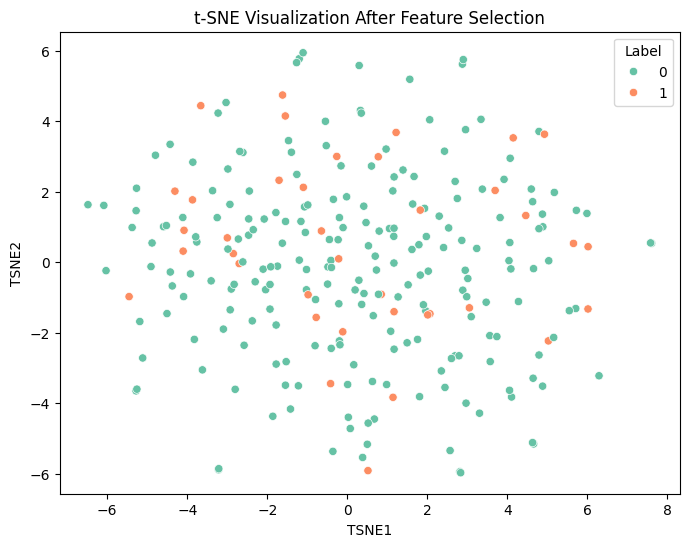

In [134]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Assuming we have a binary label for Responder / Non-Responder
y_binary = data["ORR_binary"].values
# Standardize the data
X_std = StandardScaler().fit_transform(X_high_variance_df)
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_std)

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Label'] = y_binary

plt.figure(figsize=(8,6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Label', palette='Set2')
plt.title("t-SNE Visualization After Feature Selection")
plt.show()


### Step4. First time build the Decision Tree model

I found data is imbalance, so I used Class-weighted here in Decision Tree Classifier.

In [135]:
# 1. Split the dataset into training and testing sets
# Remove target variables ("ORR", "ORR_binary"),  and "MSKCC", and all gene columns from data
## But add gene_df_filtered to X
exclude_cols = ["ORR", "ORR_binary", "Arm", "MSKCC"] + gene_features
clinical_cols = [col for col in data.columns if col not in exclude_cols]
X = pd.concat([data[clinical_cols].reset_index(drop=True), gene_df_filtered.reset_index(drop=True)], axis=1)
y = data["ORR_binary"]  # Define target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,  random_state=42)
## 20% for test, 80% for train
### random_state=42:  is used to set a fixed random seed, 
# ### ensuring that the results remain consistent across different runs of the code.


# 2. Create a Decision Tree model (use class_weight="balanced" to handle class imbalance)
model = DecisionTreeClassifier(class_weight="balanced", 
                                random_state=42)
## class_weight="balanced": allow Decision Tree to adjust data balance automatically
### if without this setting, the model may only learn 0, and ignore 1

# 3. Train the model
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)
## use X_test to predict y
## y_pred contains 0 and 1
### model.predict() creates an array, there are 0 or 1
### The length of y_pred is equal to the number of samples in X_test, 
# ### representing the modeil's predicted values for each test sample.

# 5. Evaluate the model (using Accuracy, Precision, Recall, and F1-score)
print("Accuracy of test set:", accuracy_score(y_test, y_pred))
print("Precision of test set:", precision_score(y_test, y_pred))
print("Recall of test set:", recall_score(y_test, y_pred))
print("F1-score of test set:", f1_score(y_test, y_pred))


Accuracy of test set: 0.6923076923076923
Precision of test set: 0.1
Recall of test set: 0.125
F1-score of test set: 0.1111111111111111


In [136]:
y_pred_train = model.predict(X_train)
# 5. Evaluate the model (using Accuracy, Precision, Recall, and F1-score)
print("Accuracy of train set:", accuracy_score(y_train, y_pred_train))
print("Precision of train set:", precision_score(y_train, y_pred_train))
print("Recall of train set:", recall_score(y_train, y_pred_train))
print("F1-score of train set:", f1_score(y_train, y_pred_train))

Accuracy of train set: 1.0
Precision of train set: 1.0
Recall of train set: 1.0
F1-score of train set: 1.0


In [137]:

print("Decision Tree depth:", model.get_depth())
print("Number of leaves:", model.get_n_leaves())

Decision Tree depth: 14
Number of leaves: 31


In [138]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


accuracy_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
precision_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='precision')
recall_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall')
f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')

print("Train CV Accuracy:  {:.3f} ± {:.3f}".format(accuracy_scores.mean(), accuracy_scores.std()))
print("Train CV Precision: {:.3f} ± {:.3f}".format(precision_scores.mean(), precision_scores.std()))
print("Train CV Recall:    {:.3f} ± {:.3f}".format(recall_scores.mean(), recall_scores.std()))
print("Train CV F1 Score:  {:.3f} ± {:.3f}".format(f1_scores.mean(), f1_scores.std()))

Train CV Accuracy:  0.756 ± 0.056
Train CV Precision: 0.189 ± 0.167
Train CV Recall:    0.133 ± 0.067
Train CV F1 Score:  0.143 ± 0.081


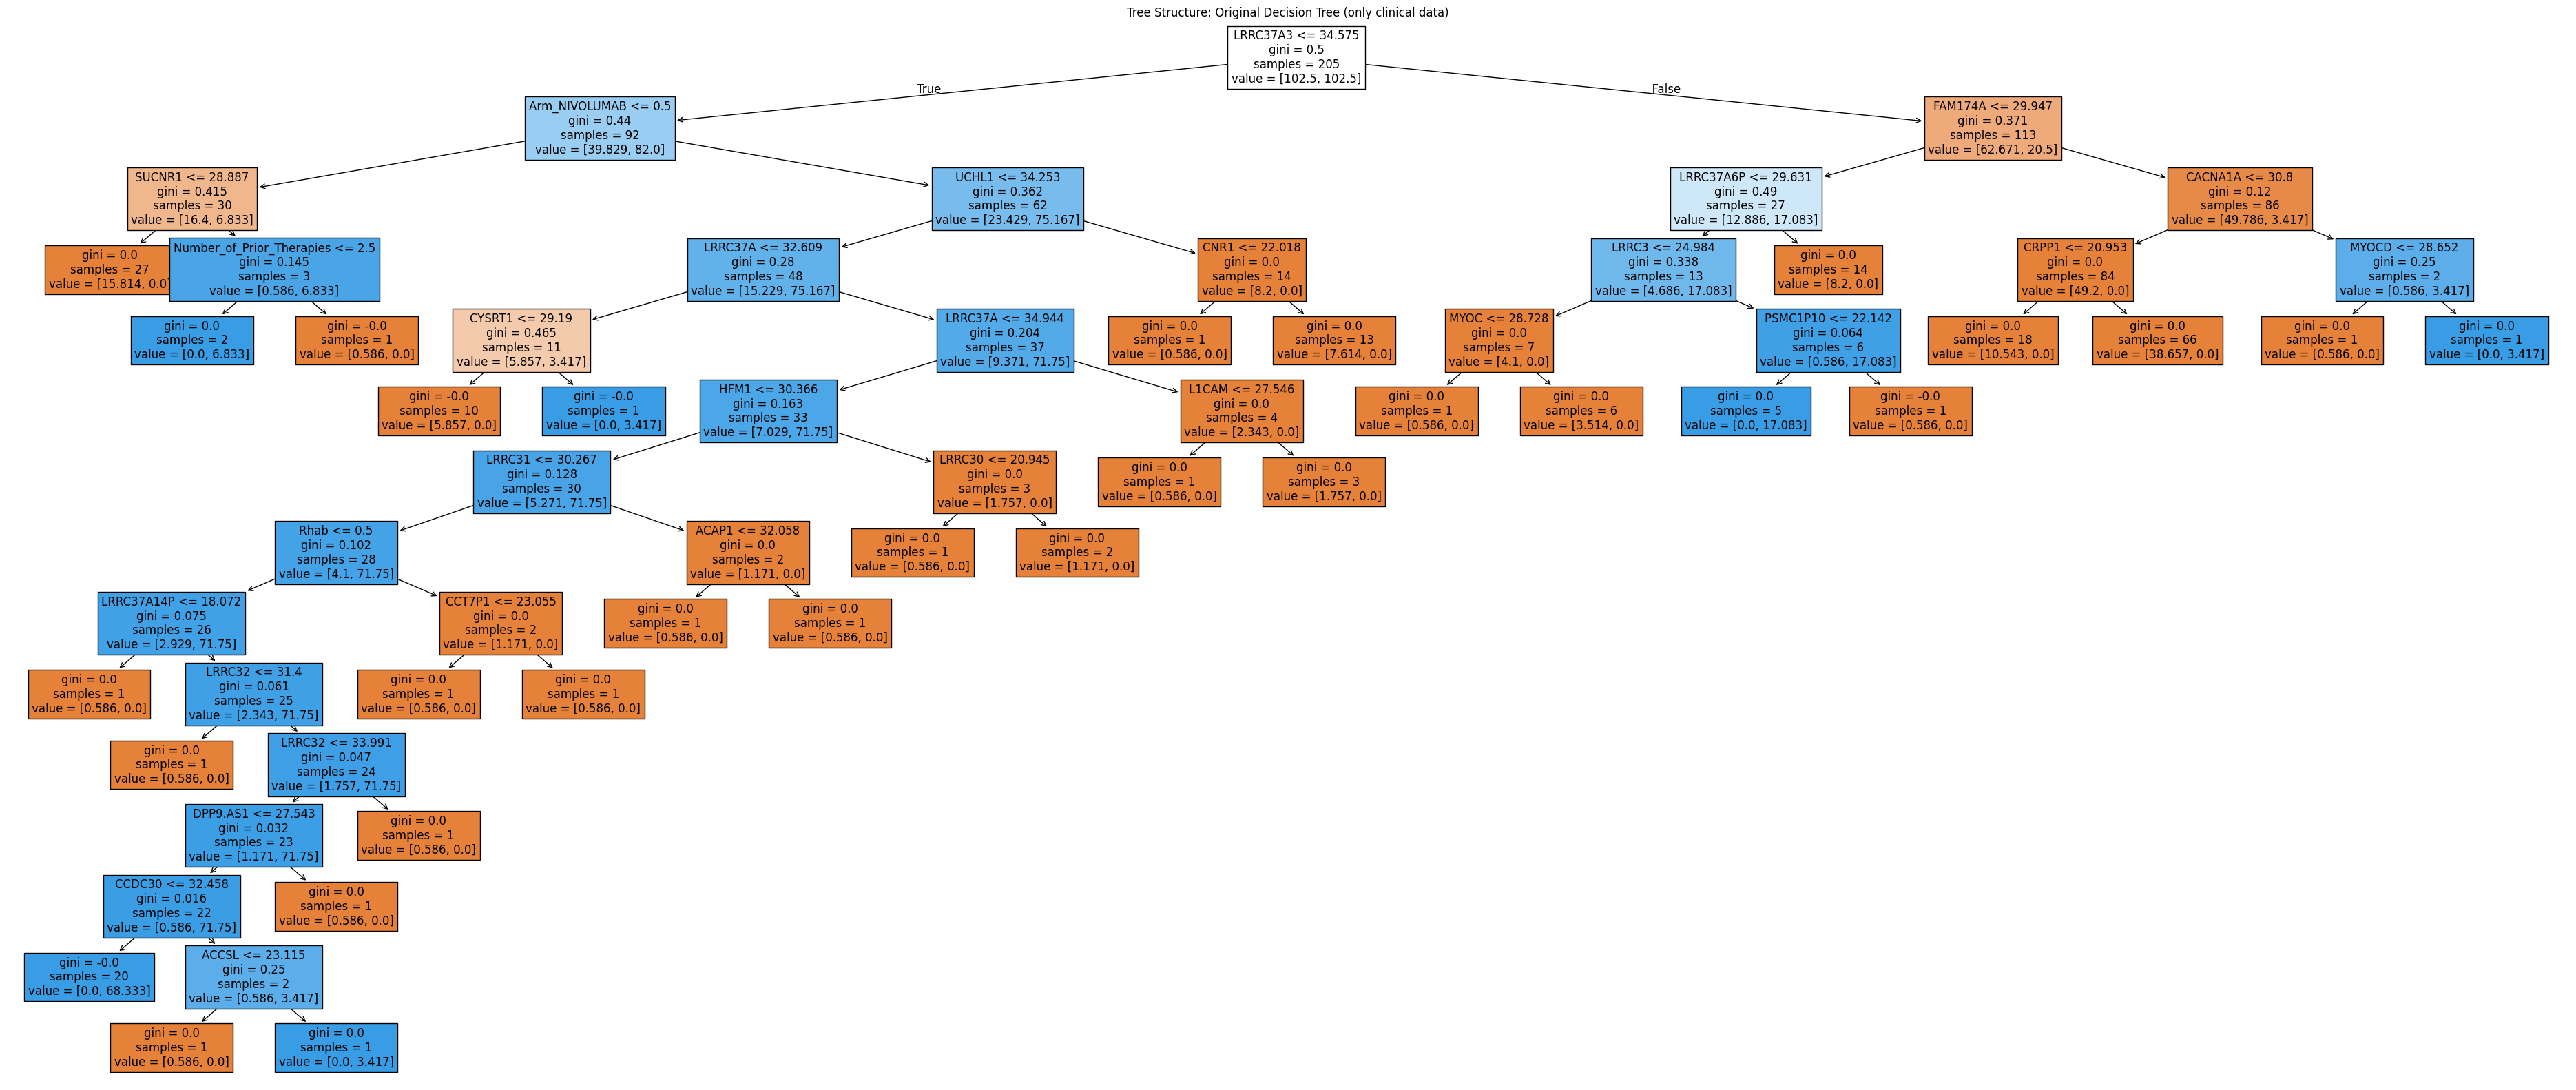

In [139]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(48, 20))  
plot_tree(model, feature_names=X.columns, filled=True, fontsize=12)
plt.title("Tree Structure: Original Decision Tree (only clinical data)")
plt.show()



Just want to make sure the value = [0,1] (Non-responder, Responder)

In [140]:
print(model.classes_)

[0 1]


In [141]:
# Predict on the test set
# The probability that the model predicts the positive class (responder)
y_pred = model.predict(X_test)


In [142]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[35  9]
 [ 7  1]]


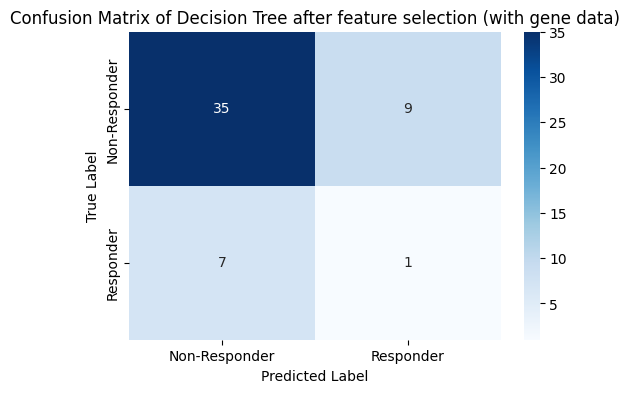

In [143]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Responder", "Responder"], yticklabels=["Non-Responder", "Responder"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Decision Tree after feature selection (with gene data)")
plt.show()

Cross-Validated Confusion Matrix (on training set):
 [[145  30]
 [ 23   7]]


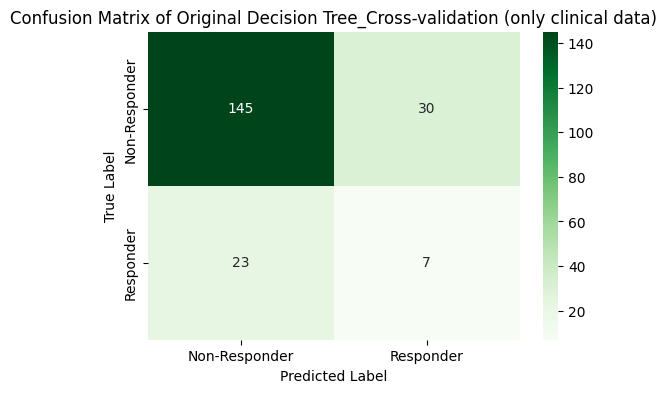

In [144]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_cv_pred = cross_val_predict(model, X_train, y_train, cv=5)


cm_cv = confusion_matrix(y_train, y_train_cv_pred)
print("Cross-Validated Confusion Matrix (on training set):\n", cm_cv)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_cv, annot=True, fmt="d", cmap="Greens", 
            xticklabels=["Non-Responder", "Responder"], 
            yticklabels=["Non-Responder", "Responder"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Original Decision Tree_Cross-validation (only clinical data)")
plt.show()

Extract feature importances from the model

In [145]:
# Extract feature importances from the model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df.head(20))  # Display top 10 important features

                      Feature  Importance
49                   LRRC37A3    0.175515
71                      UCHL1    0.101431
52                    FAM174A    0.095701
92                     SUCNR1    0.083591
4               Arm_NIVOLUMAB    0.080444
54                    LRRC37A    0.080072
51                  LRRC37A6P    0.071574
10                      LRRC3    0.060699
75                    CACNA1A    0.052629
34                     CYSRT1    0.042105
84                       HFM1    0.029090
14                     LRRC32    0.021779
1                        Rhab    0.020774
31                     LRRC31    0.020142
40                   DPP9.AS1    0.011154
61                   PSMC1P10    0.011050
9                  LRRC37A14P    0.010633
2   Number_of_Prior_Therapies    0.010526
35                      ACCSL    0.009756
24                      MYOCD    0.009756


Drawing learning curve

In [146]:
from sklearn.model_selection import learning_curve, StratifiedKFold

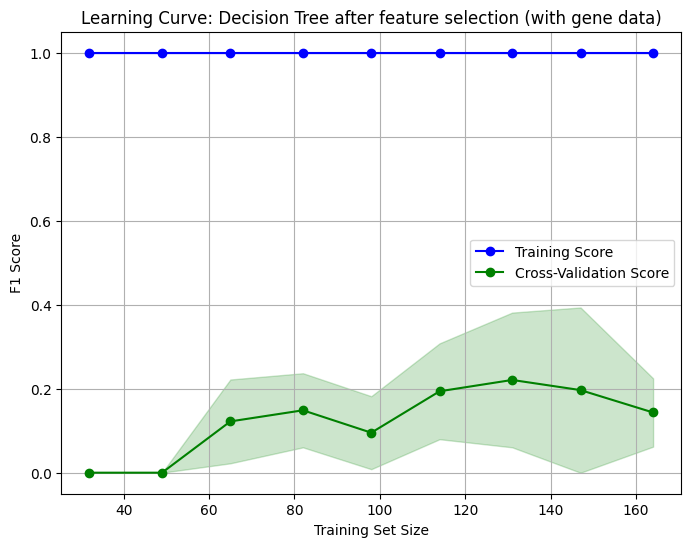

In [147]:

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the range of training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=cv, scoring='f1', train_sizes=train_sizes, n_jobs=-1
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score", color="blue", marker="o")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, test_scores_mean, label="Cross-Validation Score", color="green", marker="o")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="green")
plt.title("Learning Curve: Decision Tree after feature selection (with gene data)")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [81]:
from sklearn.model_selection import cross_val_score

# Training score
training_score = model.score(X_train, y_train)
print("Training Score:", training_score)

# Cross-validation score
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Training Score: 1.0
Cross-Validation Scores: [0.16666667 0.13333333 0.         0.16666667 0.25      ]
Mean Cross-Validation Score: 0.14333333333333334


 ### Step.5 Compare the selected genes with a supervised method such as ANOVA

In [148]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# gene_df_filtered = (after selected) gene features（DataFrame）
# y = target variable (e.g., ORR_binary or ORR_3class)（Series）

# Apply ANOVA (f_classif)
anova_selector = SelectKBest(score_func=f_classif, k='all')  # 'all' to get all features
anova_selector.fit(gene_df_filtered, y)

# show the results in a DataFrame
anova_scores = pd.DataFrame({
    'Gene': gene_df_filtered.columns,
    'F_score': anova_selector.scores_,
    'p_value': anova_selector.pvalues_
}).sort_values(by='F_score', ascending=False)

# show the top 10 features
print(anova_scores.head(10))


         Gene   F_score   p_value
48     CCDC30  8.528875  0.003808
85    DPH5.DT  5.986825  0.015089
82      SIMC1  3.818352  0.051787
40  BMAL2.AS1  3.336352  0.068934
68    CCDC146  3.137889  0.077687
35      GCOM1  2.781733  0.096572
41   LRRC37A3  2.750427  0.098458
66     CCT7P1  2.603572  0.107860
63      UCHL1  2.583182  0.109242
34    FAM170A  2.521679  0.113530


Compare ANOVA ang Variance/Correlation result

In [149]:

# selected genes based on ANOVA
anova_genes = anova_scores[anova_scores['F_score'] > 3]['Gene'].tolist()  # Adjust the threshold as needed

# selected genes from Variance/Correlation
filtered_genes = set(gene_df_filtered.columns)

# Convert anova_genes to set for set operations
anova_genes_set = set(anova_genes)

# intersection of selected genes
common_genes = anova_genes_set & filtered_genes

# only selected by ANOVA
only_anova = anova_genes_set - filtered_genes

# only selected by Variance/Correlation
only_filtered = filtered_genes - anova_genes_set


In [150]:
print(" Genes selected by both ANOVA and Variance/Correlation:")
print(sorted(common_genes))

print("Genes only selected by ANOVA:")
print(sorted(only_anova))

print("Genes only selected by Variance/Correlation:")
print(sorted(only_filtered))


 Genes selected by both ANOVA and Variance/Correlation:
['BMAL2.AS1', 'CCDC146', 'CCDC30', 'DPH5.DT', 'SIMC1']
Genes only selected by ANOVA:
[]
Genes only selected by Variance/Correlation:
['ACAP1', 'ACCS', 'ACCSL', 'ADCY5', 'AHRR', 'ARHGAP42', 'ATXN3L', 'BARX2', 'BICD1', 'BPY2B', 'BTBD10P1', 'C3orf20', 'CACNA1A', 'CACNG2', 'CAP1P2', 'CCT7P1', 'CCT7P2', 'CDS1', 'CEACAM6', 'CHST4', 'CLDN6', 'CLSPN', 'CNR1', 'CPPED1', 'CRPP1', 'CYSRT1', 'DCAF12L1', 'DCAF12L2', 'DCAF13P1', 'DLGAP5', 'DOC2A', 'DPP4', 'DPP9.AS1', 'DSPP', 'ENAHP1', 'ENAM', 'EPHB2', 'EXO1', 'FAM13A.AS1', 'FAM170A', 'FAM174A', 'FLT3', 'FLT3LG', 'GADD45A', 'GAGE2E', 'GCOM1', 'GOT2P1', 'GOT2P3', 'GPR42', 'HFM1', 'HLA.G', 'KRBA2', 'KRTAP2.3', 'L1CAM', 'LRRC3', 'LRRC30', 'LRRC31', 'LRRC32', 'LRRC34', 'LRRC36', 'LRRC37A', 'LRRC37A13P', 'LRRC37A14P', 'LRRC37A15P', 'LRRC37A2', 'LRRC37A3', 'LRRC37A6P', 'LRRC38', 'LRRC39', 'LRRC3B', 'LRRC3C', 'MASP1', 'MYOC', 'MYOCD', 'NECAP1P2', 'PSMC1P10', 'RAB3B', 'SUCNR1', 'TENM3', 'TSSK3', 'UCHL1'

### Step6. Complexity reduction

max_depth=7,<br>min_samples_split=5,
<br>min_samples_leaf=7

In [151]:
# 1. Split the dataset into training and testing sets
# Remove target variables ("ORR", "ORR_binary"),  and "MSKCC", and all gene columns from data
## But add gene_df_filtered to X
exclude_cols = ["ORR", "ORR_binary", "Arm", "MSKCC"] + gene_features
clinical_cols = [col for col in data.columns if col not in exclude_cols]
X = pd.concat([data[clinical_cols].reset_index(drop=True), gene_df_filtered.reset_index(drop=True)], axis=1)
y = data["ORR_binary"]  # Define target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,  random_state=42)
## 20% for test, 80% for train
### random_state=42:  is used to set a fixed random seed, 
# ### ensuring that the results remain consistent across different runs of the code.


# 2. Create a Decision Tree model (use class_weight="balanced" to handle class imbalance)
model = DecisionTreeClassifier(class_weight="balanced", 
                                random_state=42,
                                max_depth=7,                        min_samples_split=5,
min_samples_leaf=7,

)
## class_weight="balanced": allow Decision Tree to adjust data balance automatically
### if without this setting, the model may only learn 0, and ignore 1

# 3. Train the model
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)
## use X_test to predict y
## y_pred contains 0 and 1
### model.predict() creates an array, there are 0 or 1
### The length of y_pred is equal to the number of samples in X_test, 
# ### representing the modeil's predicted values for each test sample.

# 5. Evaluate the model (using Accuracy, Precision, Recall, and F1-score)
print("Accuracy of test set:", accuracy_score(y_test, y_pred))
print("Precision of test set:", precision_score(y_test, y_pred))
print("Recall of test set:", recall_score(y_test, y_pred))
print("F1-score of test set:", f1_score(y_test, y_pred))


Accuracy of test set: 0.5769230769230769
Precision of test set: 0.15
Recall of test set: 0.375
F1-score of test set: 0.21428571428571427


In [153]:
y_pred_train = model.predict(X_train)
# 5. Evaluate the model (using Accuracy, Precision, Recall, and F1-score)
print("Accuracy of train set:", accuracy_score(y_train, y_pred_train))
print("Precision of train set:", precision_score(y_train, y_pred_train))
print("Recall of train set:", recall_score(y_train, y_pred_train))
print("F1-score of train set:", f1_score(y_train, y_pred_train))


print("Decision Tree depth:", model.get_depth())
print("Number of leaves:", model.get_n_leaves())

Accuracy of train set: 0.848780487804878
Precision of train set: 0.49122807017543857
Recall of train set: 0.9333333333333333
F1-score of train set: 0.6436781609195402
Decision Tree depth: 7
Number of leaves: 15


In [154]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


accuracy_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
precision_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='precision')
recall_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall')
f1_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')

print("Train CV Accuracy:  {:.3f} ± {:.3f}".format(accuracy_scores.mean(), accuracy_scores.std()))
print("Train CV Precision: {:.3f} ± {:.3f}".format(precision_scores.mean(), precision_scores.std()))
print("Train CV Recall:    {:.3f} ± {:.3f}".format(recall_scores.mean(), recall_scores.std()))
print("Train CV F1 Score:  {:.3f} ± {:.3f}".format(f1_scores.mean(), f1_scores.std()))

Train CV Accuracy:  0.717 ± 0.092
Train CV Precision: 0.195 ± 0.179
Train CV Recall:    0.233 ± 0.170
Train CV F1 Score:  0.209 ± 0.176


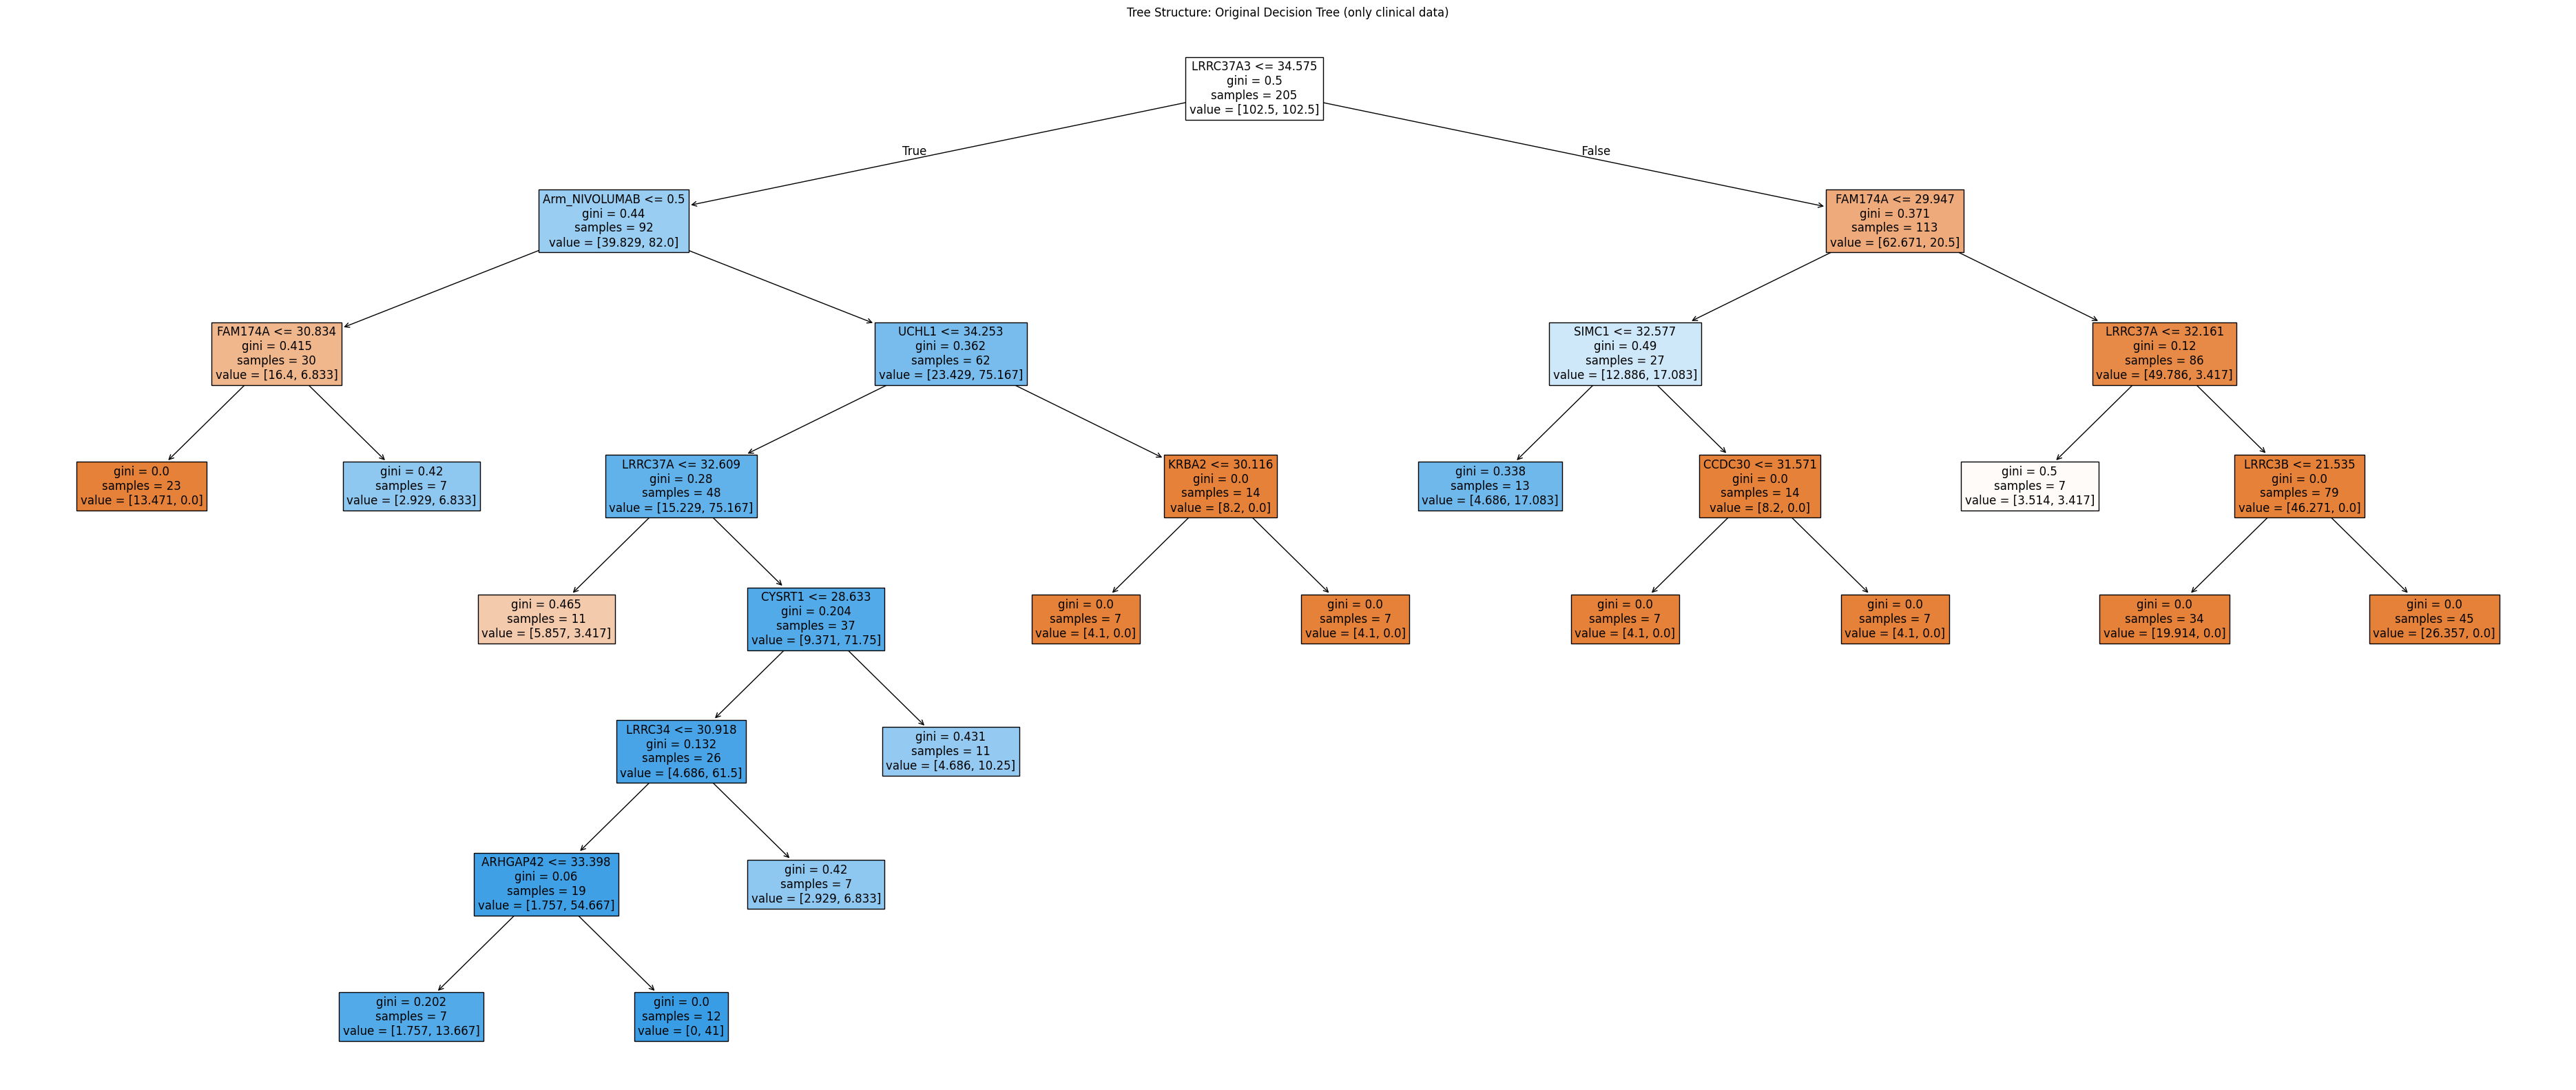

In [155]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(48, 20))  
plot_tree(model, feature_names=X.columns, filled=True, fontsize=12)
plt.title("Tree Structure: Original Decision Tree (only clinical data)")
plt.show()



Confusion Matrix:
 [[27 17]
 [ 5  3]]


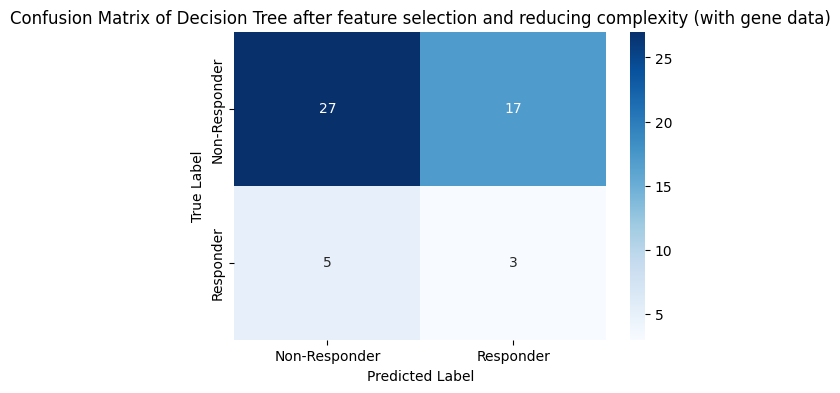

In [156]:
# Predict on the test set
# The probability that the model predicts the positive class (responder)
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Responder", "Responder"], yticklabels=["Non-Responder", "Responder"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Decision Tree after feature selection and reducing complexity (with gene data)")
plt.show()

Cross-Validated Confusion Matrix (on training set):
 [[128  47]
 [ 20  10]]


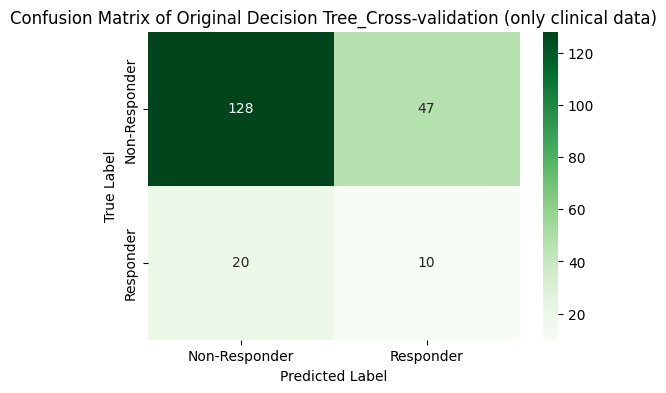

In [157]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_cv_pred = cross_val_predict(model, X_train, y_train, cv=5)


cm_cv = confusion_matrix(y_train, y_train_cv_pred)
print("Cross-Validated Confusion Matrix (on training set):\n", cm_cv)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_cv, annot=True, fmt="d", cmap="Greens", 
            xticklabels=["Non-Responder", "Responder"], 
            yticklabels=["Non-Responder", "Responder"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix of Original Decision Tree_Cross-validation (only clinical data)")
plt.show()

In [158]:
# Extract feature importances from the model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print(importance_df.head(20))  # Display top 10 important features

          Feature    Importance
49       LRRC37A3  2.584068e-01
52        FAM174A  2.205746e-01
71          UCHL1  1.493344e-01
4   Arm_NIVOLUMAB  1.184368e-01
54        LRRC37A  1.057519e-01
90          SIMC1  1.053764e-01
34         CYSRT1  2.065905e-02
59         LRRC34  1.728128e-02
79       ARHGAP42  4.178696e-03
66          KRBA2  1.438413e-15
81         LRRC3B  4.427323e-16
56         CCDC30  1.307648e-16
63          CRPP1  0.000000e+00
0            Sarc  0.000000e+00
64     LRRC37A15P  0.000000e+00
65         LRRC30  0.000000e+00
67          HLA.G  0.000000e+00
60       DCAF13P1  0.000000e+00
62        CEACAM6  0.000000e+00
61       PSMC1P10  0.000000e+00


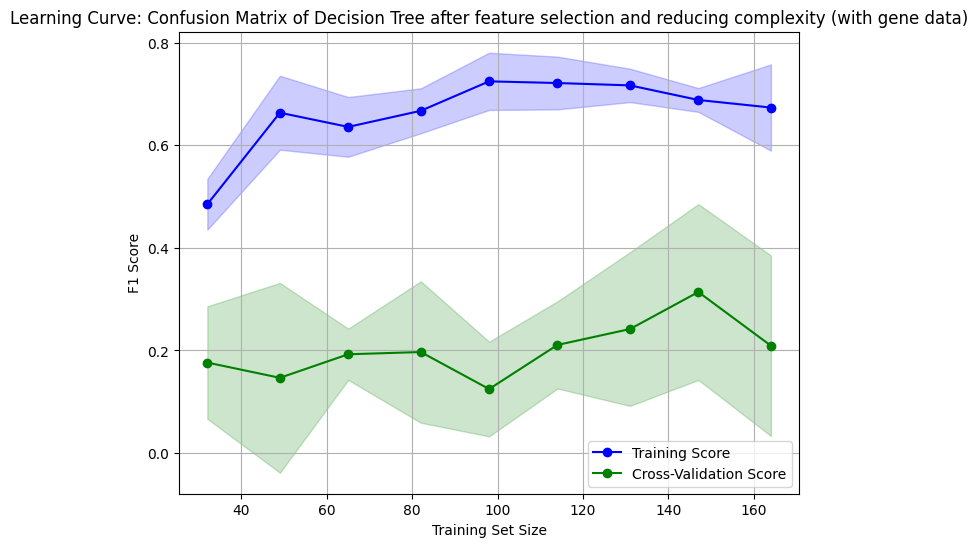

In [159]:

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the range of training sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=cv, scoring='f1', train_sizes=train_sizes, n_jobs=-1
)

# Calculate the mean and standard deviation of training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score", color="blue", marker="o")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="blue")
plt.plot(train_sizes, test_scores_mean, label="Cross-Validation Score", color="green", marker="o")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="green")
plt.title("Learning Curve: Confusion Matrix of Decision Tree after feature selection and reducing complexity (with gene data)")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.legend(loc="best")
plt.grid()
plt.show()

In [111]:
from sklearn.model_selection import cross_val_score

# Training score
training_score = model.score(X_train, y_train)
print("Training Score:", training_score)

# Cross-validation score
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Training Score: 0.848780487804878
Cross-Validation Scores: [0.30769231 0.         0.10526316 0.13333333 0.5       ]
Mean Cross-Validation Score: 0.2092577597840756


### Step.7 Apply Anova after reduing complexity

In [112]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# gene_df_filtered = (after selected) gene features（DataFrame）
# y = target variable (e.g., ORR_binary or ORR_3class)（Series）

# Apply ANOVA (f_classif)
anova_selector = SelectKBest(score_func=f_classif, k='all')  # 'all' to get all features
anova_selector.fit(gene_df_filtered, y)

# show the results in a DataFrame
anova_scores = pd.DataFrame({
    'Gene': gene_df_filtered.columns,
    'F_score': anova_selector.scores_,
    'p_value': anova_selector.pvalues_
}).sort_values(by='F_score', ascending=False)

# show the top 10 features
print(anova_scores.head(10))


         Gene   F_score   p_value
48     CCDC30  8.528875  0.003808
85    DPH5.DT  5.986825  0.015089
82      SIMC1  3.818352  0.051787
40  BMAL2.AS1  3.336352  0.068934
68    CCDC146  3.137889  0.077687
35      GCOM1  2.781733  0.096572
41   LRRC37A3  2.750427  0.098458
66     CCT7P1  2.603572  0.107860
63      UCHL1  2.583182  0.109242
34    FAM170A  2.521679  0.113530


In [94]:
# all genes selected by ANOVA (after filtering)
## anova_genes = set(anova_scores['Gene'])

# after VarianceThreshold + correlation filtering, we have gene_df_filtered
## filtered_genes = set(gene_df_filtered.columns)

# find common genes, only in anova_genes, and only in filtered_genes
## common_genes = anova_genes & filtered_genes
## only_anova = anova_genes - filtered_genes
## only_filtered = filtered_genes - anova_genes

In [113]:
print(" Genes selected by both ANOVA and Variance/Correlation:")
print(sorted(common_genes))

print("Genes only selected by ANOVA:")
print(sorted(only_anova))

print("Genes only selected by Variance/Correlation:")
print(sorted(only_filtered))


 Genes selected by both ANOVA and Variance/Correlation:
['BMAL2.AS1', 'CCDC146', 'CCDC30', 'DPH5.DT', 'SIMC1']
Genes only selected by ANOVA:
[]
Genes only selected by Variance/Correlation:
['ACAP1', 'ACCS', 'ACCSL', 'ADCY5', 'AHRR', 'ARHGAP42', 'ATXN3L', 'BARX2', 'BICD1', 'BPY2B', 'BTBD10P1', 'C3orf20', 'CACNA1A', 'CACNG2', 'CAP1P2', 'CCT7P1', 'CCT7P2', 'CDS1', 'CEACAM6', 'CHST4', 'CLDN6', 'CLSPN', 'CNR1', 'CPPED1', 'CRPP1', 'CYSRT1', 'DCAF12L1', 'DCAF12L2', 'DCAF13P1', 'DLGAP5', 'DOC2A', 'DPP4', 'DPP9.AS1', 'DSPP', 'ENAHP1', 'ENAM', 'EPHB2', 'EXO1', 'FAM13A.AS1', 'FAM170A', 'FAM174A', 'FLT3', 'FLT3LG', 'GADD45A', 'GAGE2E', 'GCOM1', 'GOT2P1', 'GOT2P3', 'GPR42', 'HFM1', 'HLA.G', 'KRBA2', 'KRTAP2.3', 'L1CAM', 'LRRC3', 'LRRC30', 'LRRC31', 'LRRC32', 'LRRC34', 'LRRC36', 'LRRC37A', 'LRRC37A13P', 'LRRC37A14P', 'LRRC37A15P', 'LRRC37A2', 'LRRC37A3', 'LRRC37A6P', 'LRRC38', 'LRRC39', 'LRRC3B', 'LRRC3C', 'MASP1', 'MYOC', 'MYOCD', 'NECAP1P2', 'PSMC1P10', 'RAB3B', 'SUCNR1', 'TENM3', 'TSSK3', 'UCHL1'

In [114]:
# selected genes based on ANOVA
anova_all = SelectKBest(score_func=f_classif, k='all') # 'all' to get all features
anova_all.fit(gene_df, y)
anova_all_scores = pd.DataFrame({
    'Gene': gene_df.columns,
    'F_score': anova_all.scores_,
    'p_value': anova_all.pvalues_
}).sort_values(by='F_score', ascending=False)

# compare the ANOVA scores before and after filtering
# the anova scores before filtering
anova_all_scores = anova_all_scores.set_index('Gene')
# the anova scores after filtering
anova_filtered_scores = anova_scores.set_index('Gene')
# combine the two DataFrames for comparison
anova_comparison = anova_all_scores.join(anova_filtered_scores, lsuffix='_all', rsuffix='_filtered', how='outer')
# print the comparison DataFrame
print(anova_comparison.head(20))  # show the top 20 genes for comparison


            F_score_all  p_value_all  F_score_filtered  p_value_filtered
Gene                                                                    
ACAP1          1.288595     0.257373          1.288595          0.257373
ACCS           0.015000     0.902620          0.015000          0.902620
ACCSL          0.533432     0.465838          0.533432          0.465838
ADCY5          0.391502     0.532071          0.391502          0.532071
AHRR           0.465246     0.495801          0.465246          0.495801
AK3P4          0.087439     0.767700               NaN               NaN
ARHGAP42       0.521418     0.470899          0.521418          0.470899
ARPC1B         0.785001     0.376451               NaN               NaN
ATP6V1G1P2     0.214572     0.643603               NaN               NaN
ATXN3L         0.231800     0.630605          0.231800          0.630605
BARX2          0.498834     0.480658          0.498834          0.480658
BICD1          0.325472     0.568840          0.325